## EDUNET FOUNDATION - Self-Practice Exercise Notebook Solution

### LAB 21 - Implementing Naive Bayes Concepts in Python

**Problem 1:** If the weather is sunny, then the Player should play or not?

**1) Data Pre-processing step:**                             
In this step, we will pre-process/prepare the data so that we can use it efficiently in our code. It is similar as we did in data-pre-processing. The code for this is given below:

In [2]:
#Importing the libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [4]:
# Importing the dataset  
dataset = pd.read_csv('user_data.csv')  
x = dataset.iloc[:, [2, 3]].values  
y = dataset.iloc[:, 4].values 

In [5]:
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)  

In [6]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

In the above code, we have loaded the dataset into our program using "dataset = pd.read_csv('user_data.csv'). The loaded dataset is divided into training and test set, and then we have scaled the feature variable.

In [9]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**2) Fitting Naive Bayes to the Training Set:**
After the pre-processing step, now we will fit the Naive Bayes model to the Training set. Below is the code for it:

In [10]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In the above code, we have used the GaussianNB classifier to fit it to the training dataset. We can also use other classifiers as per our requirement.

**3) Prediction of the test set result:**        
Now we will predict the test set result. For this, we will create a new predictor variable y_pred, and will use the predict function to make the predictions.

In [12]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test)  

In [13]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [14]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

The above output shows the result for prediction vector y_pred and real vector y_test. We can see that some predications are different from the real values, which are the incorrect predictions.

**4) Creating Confusion Matrix:**                              
Now we will check the accuracy of the Naive Bayes classifier using the Confusion matrix. Below is the code for it:

In [16]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

**5) Visualizing the training set result:**

Next we will visualize the training set result using Naïve Bayes Classifier. Below is the code for it:

C:\Users\PRS\AppData\Local\Temp\ipykernel_4296\1295530735.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


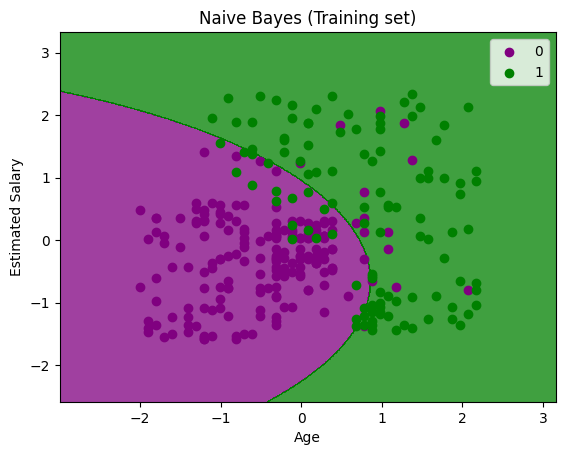

In [17]:
# Visualising the Training set results  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
X1, X2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Naive Bayes (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

In the above output we can see that the Naïve Bayes classifier has segregated the data points with the fine boundary. It is Gaussian curve as we have used GaussianNB classifier in our code.

**6) Visualizing the Test set result:**

C:\Users\PRS\AppData\Local\Temp\ipykernel_4296\1318815506.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


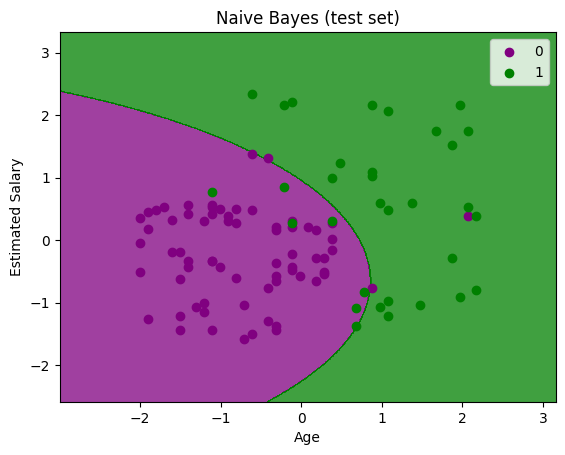

In [18]:
# Visualising the Test set results  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
X1, X2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Naive Bayes (test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

The above output is final output for test set data. As we can see the classifier has created a Gaussian curve to divide the "purchased" and "not purchased" variables. 